In [262]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.cluster import KMeans
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

In [191]:
df=pd.read_csv("Wholesale customers data.csv")
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


## Performing EDA

<AxesSubplot:>

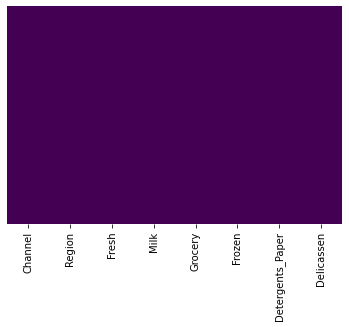

In [246]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [192]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


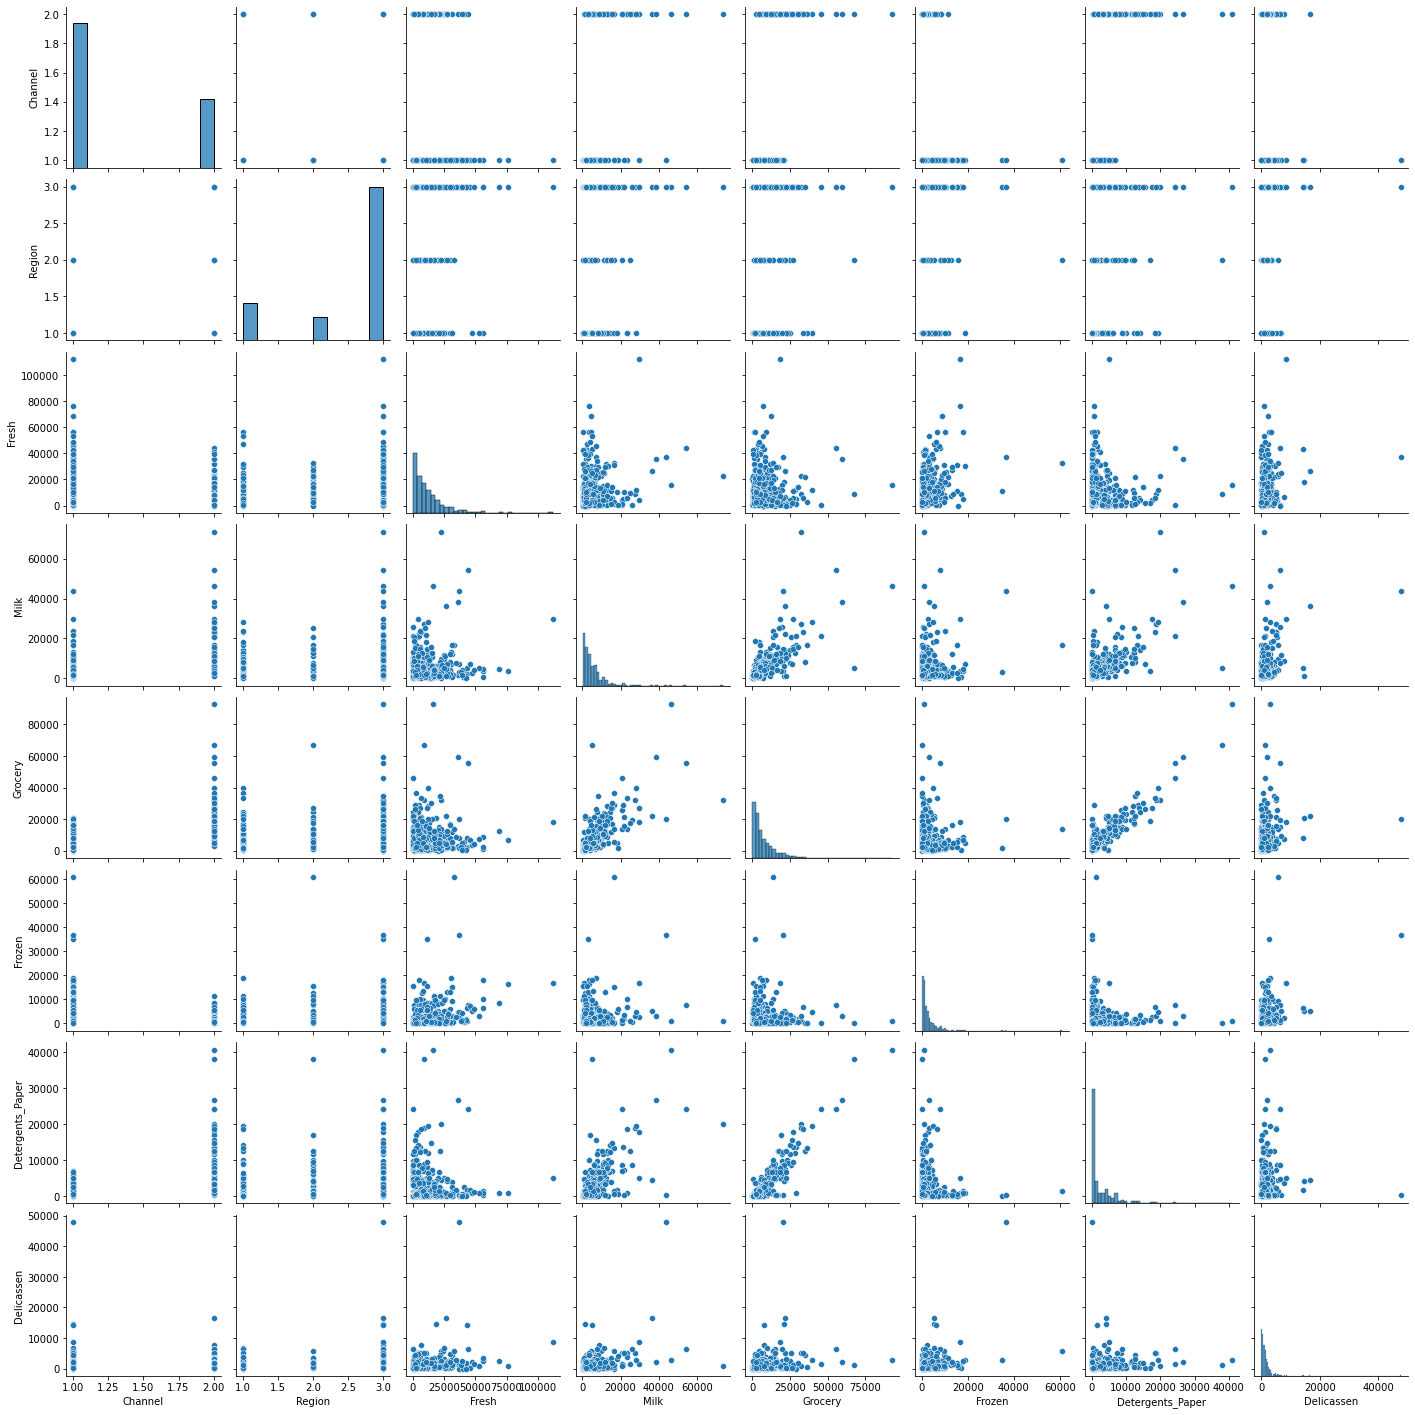

In [243]:
sns.pairplot(df)

In [195]:
df['Channel'].unique()

array([2, 1], dtype=int64)

In [196]:
df['Region'].unique()

array([3, 1, 2], dtype=int64)

<AxesSubplot:xlabel='Region', ylabel='Total'>

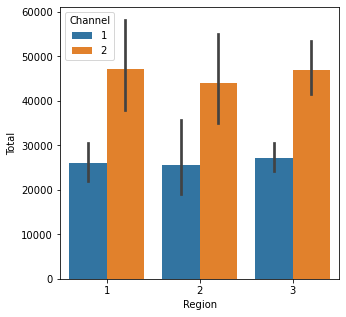

In [197]:
df['Total']=df['Fresh']+ df['Milk']+ df['Grocery']+df['Frozen']+df['Detergents_Paper']+df['Delicassen']
plt.figure(figsize=(5,5))
sns.barplot(x='Region',y='Total',hue='Channel',data=df)

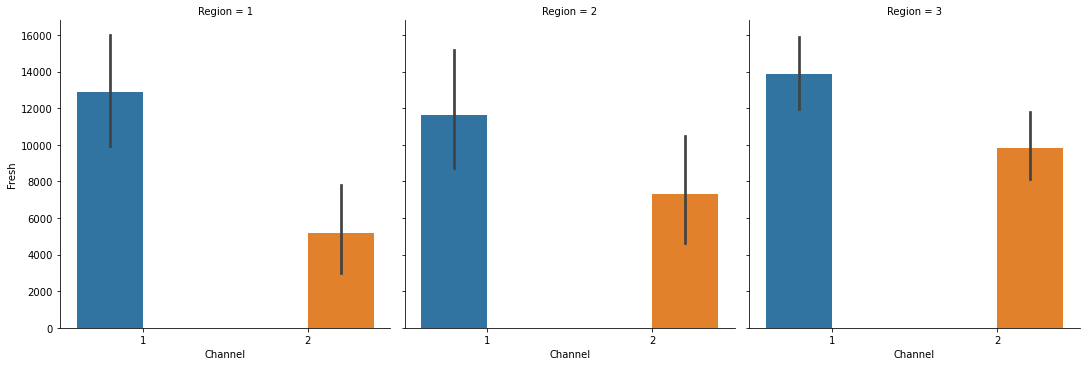

In [198]:
df.drop('Total',axis = 1, inplace = True)
sns.catplot(x='Channel',y = 'Fresh',hue="Channel",col="Region",data=df,kind="bar")

array([[<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>]], dtype=object)

<Figure size 1080x1440 with 0 Axes>

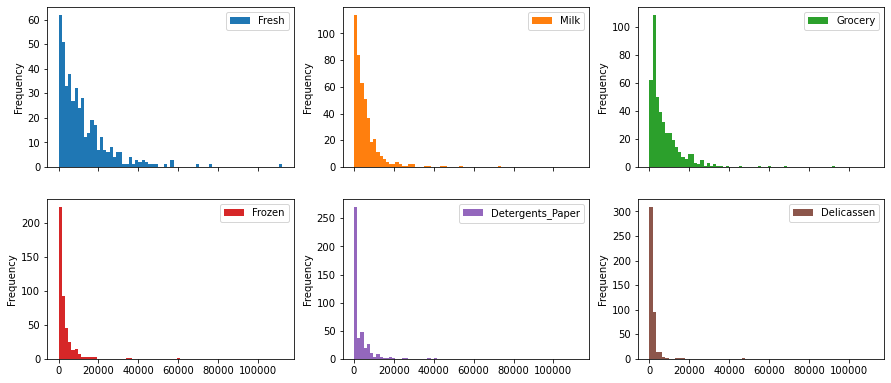

In [199]:
df1=df.copy()
df1.drop(['Channel','Region'],axis=1,inplace=True)
plt.figure(figsize=(15,20))
df1.plot(kind='hist',bins=70, subplots=True,layout=(3,3),legend=True,figsize=(15,10))

<AxesSubplot:>

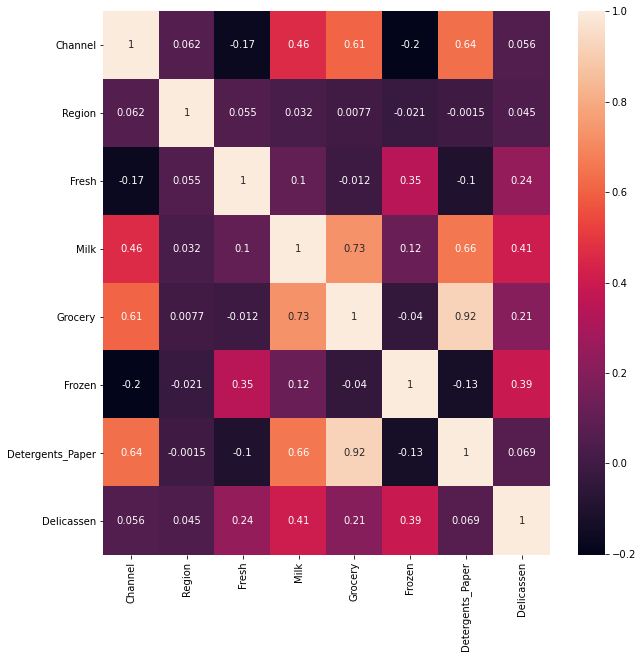

In [233]:
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True)

<AxesSubplot:>

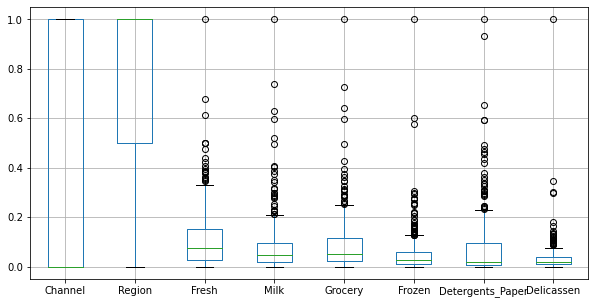

In [279]:
scaler = preprocessing.MinMaxScaler()
scaled = scaler.fit_transform(df)
scaled_data = pd.DataFrame(scaled, columns = [name for name in list(df)])
fig = plt.figure(figsize = (10,5))
scaled_data.boxplot(column=[name for name in list(scaled_data)])

No outliers

## Standard Scaler

In [202]:
df_ss=df.copy()
std_scale = StandardScaler().fit_transform(df_ss)
scaled_frame_ss = pd.DataFrame(std_scale, columns=df_ss.columns)
scaled_frame_ss.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


In [203]:
scaled_frame_ss.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,-2.452584e-16,-5.737834e-16,-2.422305e-17,-1.589638e-17,-6.030530e-17,1.135455e-17,-1.917658e-17,-8.276208e-17
std,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-6.902971e-01,-1.995342e+00,-9.496831e-01,-7.787951e-01,-8.373344e-01,-6.283430e-01,-6.044165e-01,-5.402644e-01
25%,-6.902971e-01,-7.023369e-01,-7.023339e-01,-5.783063e-01,-6.108364e-01,-4.804306e-01,-5.511349e-01,-3.964005e-01
50%,-6.902971e-01,5.906683e-01,-2.767602e-01,-2.942580e-01,-3.366684e-01,-3.188045e-01,-4.336004e-01,-1.985766e-01
75%,1.448652e+00,5.906683e-01,3.905226e-01,1.890921e-01,2.849105e-01,9.946441e-02,2.184822e-01,1.048598e-01
max,1.448652e+00,5.906683e-01,7.927738e+00,9.183650e+00,8.936528e+00,1.191900e+01,7.967672e+00,1.647845e+01


<AxesSubplot:ylabel='Density'>

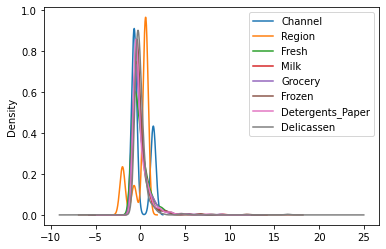

In [204]:
pd.DataFrame(scaled_frame_ss).plot(kind='kde')

<AxesSubplot:ylabel='Frequency'>

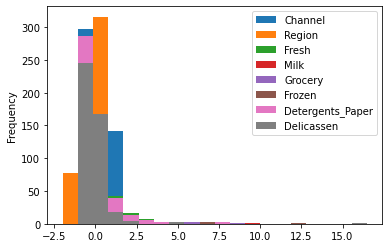

In [235]:
pd.DataFrame(scaled_frame_ss).plot(kind='hist', bins=20)

## Min Max Scaler

In [206]:
df_mm= df.copy()
minmax_scale = MinMaxScaler().fit_transform(df_mm)
scaled_frame_mm = pd.DataFrame(minmax_scale,columns=df_mm.columns)
scaled_frame_mm.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.0,1.0,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847
1,1.0,1.0,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984
2,1.0,1.0,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559
3,0.0,1.0,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234
4,1.0,1.0,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093


In [207]:
scaled_frame_mm.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,0.322727,0.771591,0.106977,0.078173,0.085671,0.050078,0.070510,0.031745
std,0.468052,0.387136,0.112774,0.100491,0.102430,0.079789,0.116790,0.058826
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.027863,0.020124,0.023174,0.011788,0.006216,0.008453
50%,0.000000,1.000000,0.075802,0.048636,0.051225,0.024670,0.019927,0.020077
75%,1.000000,1.000000,0.150968,0.097154,0.114821,0.058005,0.095997,0.037907
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:ylabel='Density'>

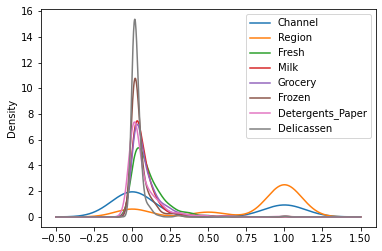

In [208]:
pd.DataFrame(scaled_frame_mm).plot(kind='kde')

<AxesSubplot:ylabel='Frequency'>

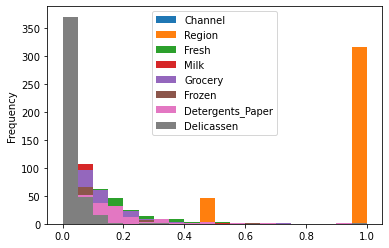

In [209]:
pd.DataFrame(scaled_frame_mm).plot(kind='hist', bins = 20)

Standard sclaer might be a better option as, in Standard scaler curve, there are no outliers where as in minmax scaler outliers are present.

Finding optimal number of features using RFECV and show the plot between Number of features selected vs Cross validation score

In [210]:
def binary(x):
    return x%2

In [211]:
X = scaled_frame_ss.drop(['Channel'], axis=1)
y = df['Channel']
y = y.apply(binary)
y

0      0
1      0
2      0
3      1
4      0
      ..
435    1
436    1
437    0
438    1
439    1
Name: Channel, Length: 440, dtype: int64

In [250]:
rf=RandomForestClassifier()

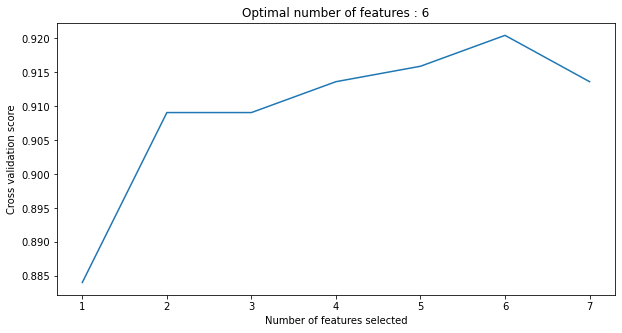

In [251]:
rfecv = RFECV(estimator=rf)
rfecv.fit(X,y)
plt.figure(figsize=(10,5))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.title("Optimal number of features : %d" % rfecv.n_features_)
plt.show()

In [284]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=42)
n_scores = cross_val_score(pipeline, X,y, scoring='accuracy', cv=cv, n_jobs = -1)
print("Score: ",np.mean(n_scores))

Score:  0.9063636363636363


In [253]:
rfecv_df = pd.DataFrame(rfecv.ranking_, index=X.columns, columns = ['Rank']).sort_values(by='Rank', ascending=True)
rfecv_df.head()

,Rank
Fresh,1
Milk,1
Grocery,1
Frozen,1
Detergents_Paper,1


In [254]:
print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 6


## K-Means

Text(0, 0.5, 'kmeans_inertia')

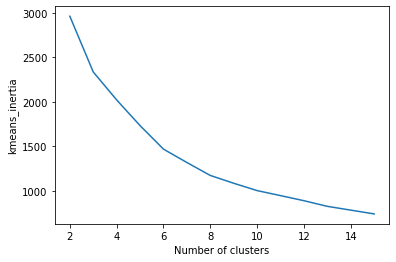

In [255]:
kmeans_inertia = []
for i in range(2, 16):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(scaled_frame)
    kmeans_inertia.append(kmeans.inertia_)
    cluster_labels = kmeans.labels_
plt.plot(range(2, 16), kmeans_inertia)
plt.xlabel('Number of clusters')
plt.ylabel('kmeans_inertia')

Based on the above plot, we can see that there are 6 elbows and hence our optimum number of clusters will be 6.

## PCA

In [256]:
kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=400, n_init=100, random_state=0)
y_means = kmeans.fit(scaled_frame)

In [282]:
pca2 = PCA(n_components=2).fit(scaled_frame_ss)
pca2d = pca2.transform(scaled_frame_ss)

print("Variance",pca2.explained_variance_ratio_)

Variance [0.38750123 0.22374588]


The variance for the 1st component is 38.75% and for the second component it is 22.37%.

Variance: [0.38750123 0.22374588 0.12647173 0.09229904]


C:\Users\amanm\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


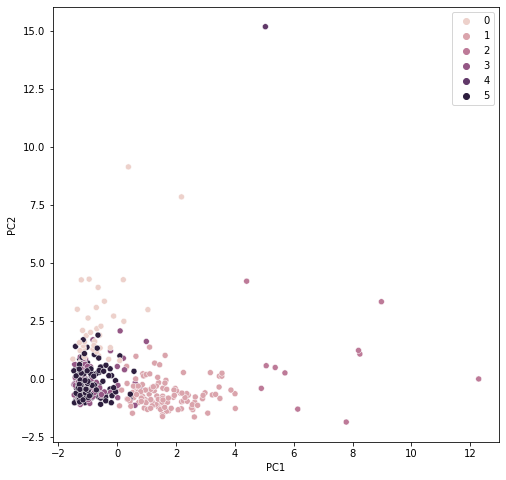

In [283]:
pca4 = PCA(n_components=4).fit(scaled_frame_ss)
pca4d = pca4.transform(scaled_frame_ss)

print("Variance:",pca4.explained_variance_ratio_)

plt.figure(figsize = (8,8))
sns.scatterplot(pca4d[:,0], pca4d[:,1], 
                hue=y_means.labels_)
plt.legend()
plt.ylabel('PC2')
plt.xlabel('PC1')
plt.show()

The 1st component holds 38.75% of the information while the 2nd component holds only 22.37% , 3rd component holds 12.64% and 4th component holds 9.22%of the information.

## XGBoost

In [223]:
X = df.drop('Channel', axis=1)
y = df['Channel']
y

0      2
1      2
2      2
3      1
4      2
      ..
435    1
436    1
437    2
438    1
439    1
Name: Channel, Length: 440, dtype: int64

In [224]:
y = y.apply(binary)
y

0      0
1      0
2      0
3      1
4      0
      ..
435    1
436    1
437    0
438    1
439    1
Name: Channel, Length: 440, dtype: int64

In [225]:
model = XGBClassifier(eval_metric='mlogloss')
kfold = KFold(n_splits=5)

In [265]:
results = cross_val_score(model, X, y, cv=kfold)
print("Accuracy: %f" % (results.mean()*100))
Accuracy = results.mean()*100

C:\Users\amanm\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amanm\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amanm\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of 

Accuracy: 91.136364


C:\Users\amanm\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amanm\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [281]:
PW = cross_val_score(model, X, y, cv=kfold, scoring='precision_weighted')
Rscore = cross_val_score(model, X, y, cv=kfold, scoring='recall_weighted')
Recall = Rscore.mean()*100
Precision = PW.mean()*100

f1score=2*((Recall*Precision)/(Recall+Precision))
print("Recall:%f, Precision:%f, f1score:%f" % (Recall,Precision,f1score))

C:\Users\amanm\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amanm\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amanm\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of 

Recall:91.136364, Precision:91.823619, f1score:91.478700


C:\Users\amanm\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amanm\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
